In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [3]:
# import CSVs for analysis
cob_percent_csv = "Resources/child_obesity_percentage.csv"
child_obesity_percentage_df = pd.read_csv(cob_percent_csv)
child_obesity_percentage_df

,Unnamed: 0,year,year_num,age,estimate
0,0,1988-1994,1,2-19 years,10.0
1,1,1999-2002,2,2-19 years,14.8
2,2,2001-2004,3,2-19 years,16.3
3,3,2003-2006,4,2-19 years,16.3
4,4,2005-2008,5,2-19 years,16.2
5,5,2007-2010,6,2-19 years,16.8
6,6,2009-2012,7,2-19 years,16.9
7,7,2011-2014,8,2-19 years,17.0
8,8,2013-2016,9,2-19 years,17.8
9,9,2015-2018,10,2-19 years,18.9


In [4]:
cob_percent_bypoverty_csv = "Resources/child_obesity_by_poverty_level_percentage.csv"
child_obesity_by_poverty_df = pd.read_csv(cob_percent_bypoverty_csv)
child_obesity_by_poverty_df

,year,Below 100%,100%-199%,200%-399%,400% or more
0,1988-1994,12.6,10.2,9.4,4.7
1,1999-2002,17.6,15.3,14.0,12.6
2,2001-2004,17.9,16.7,17.8,11.2
3,2003-2006,18.9,17.4,17.1,11.0
4,2005-2008,19.9,18.2,16.0,11.6
5,2007-2010,20.8,18.3,16.7,11.9
6,2009-2012,20.9,18.5,15.9,11.5
7,2011-2014,19.4,20.3,16.4,11.4
8,2013-2016,21.0,20.7,16.9,12.2
9,2015-2018,23.9,21.7,18.4,10.6


In [5]:
child_obesity_with_poverty = pd.merge(child_obesity_percentage_df, child_obesity_by_poverty_df, on = "year")
child_obesity_with_poverty

,Unnamed: 0,year,year_num,age,estimate,Below 100%,100%-199%,200%-399%,400% or more
0,0,1988-1994,1,2-19 years,10.0,12.6,10.2,9.4,4.7
1,1,1999-2002,2,2-19 years,14.8,17.6,15.3,14.0,12.6
2,2,2001-2004,3,2-19 years,16.3,17.9,16.7,17.8,11.2
3,3,2003-2006,4,2-19 years,16.3,18.9,17.4,17.1,11.0
4,4,2005-2008,5,2-19 years,16.2,19.9,18.2,16.0,11.6
5,5,2007-2010,6,2-19 years,16.8,20.8,18.3,16.7,11.9
6,6,2009-2012,7,2-19 years,16.9,20.9,18.5,15.9,11.5
7,7,2011-2014,8,2-19 years,17.0,19.4,20.3,16.4,11.4
8,8,2013-2016,9,2-19 years,17.8,21.0,20.7,16.9,12.2
9,9,2015-2018,10,2-19 years,18.9,23.9,21.7,18.4,10.6


In [6]:
child_obesity_with_poverty = child_obesity_with_poverty[["year", "estimate", "Below 100%"]]
# child_obesity_with_poverty = child_obesity_with_poverty.set_index("year")
child_obesity_with_poverty

,year,estimate,Below 100%
0,1988-1994,10.0,12.6
1,1999-2002,14.8,17.6
2,2001-2004,16.3,17.9
3,2003-2006,16.3,18.9
4,2005-2008,16.2,19.9
5,2007-2010,16.8,20.8
6,2009-2012,16.9,20.9
7,2011-2014,17.0,19.4
8,2013-2016,17.8,21.0
9,2015-2018,18.9,23.9


In [7]:
# rename columns for chart clarity
child_obesity_with_poverty_df = child_obesity_with_poverty.rename(columns = {"estimate": "% Child Obesity, Overall Population", "Below 100%": "% Child Obesity, in Poverty"})

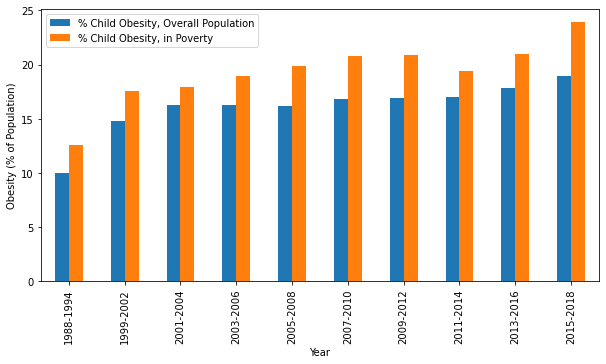

In [8]:
# convert to chart
child_obesity_with_poverty_level = child_obesity_with_poverty_df.plot(kind = "bar", figsize = (10, 5))
child_obesity_with_poverty_level.set_xticklabels(child_obesity_with_poverty_df["year"], rotation = "vertical")
plt.xlabel("Year")
plt.ylabel("Obesity (% of Population)")
plt.savefig("Images/child_obesity_v_poverty.png")

In [9]:
# read new dataset in
poverty_csv = "Resources/poverty_csv"

poverty_data = pd.read_csv(poverty_csv)

poverty_data.head()

,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
1,2004,0,US,United States,12.7,"44,334","8,430,886",16.2
2,2005,0,US,United States,13.3,46242,8765541,17.0
3,2006,0,US,United States,13.3,48451,8700048,16.7
4,2007,0,US,United States,13.0,50740,8499844,16.4


In [10]:
# clean to necessary columns
poverty_data_child = poverty_data[["Year", "Poverty Percent Ages 5-17"]]
poverty_data_child

,Year,Poverty Percent Ages 5-17
0,2003,16.1
1,2004,16.2
2,2005,17.0
3,2006,16.7
4,2007,16.4
5,2008,16.5
6,2009,18.2
7,2010,19.8
8,2011,20.8
9,2012,21.0


In [11]:
# chart information
year = poverty_data_child["Year"]

poverty_percent = poverty_data_child["Poverty Percent Ages 5-17"]


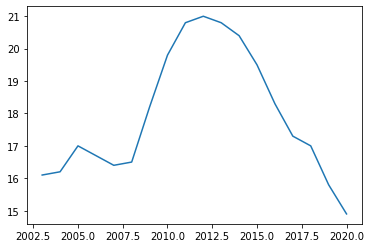

In [12]:
poverty_rates = plt.plot(year, poverty_percent)

In [13]:
# pull next CSV for statistical analysis
youth_obesity_csv = "Resources/youth_obesity_summary.csv"
youth_obesity_df = pd.read_csv(youth_obesity_csv)
youth_obesity_df.head()

,locationdesc,2001,2003,2005,2007,2009,2011,2013,2015,2017,2019
0,Alabama,12.3,13.3,14.6,NaN,13.3,17.0,17.1,16.1,NaN,17.2
1,Alaska,NaN,11.0,NaN,11.0,11.9,11.5,12.4,14.0,13.7,14.8
2,Arizona,NaN,11.1,11.8,11.6,12.8,10.9,10.7,10.9,12.3,13.3
3,Arkansas,13.7,NaN,15.3,13.7,14.3,15.2,17.8,18.0,21.7,22.1
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,13.9,15.9


In [13]:
youth_obesity_anova = pd.read_csv("Resources/youth_obesity_anova_scores.csv")
youth_obesity_anova['% Obesity'] = youth_obesity_anova['% Obesity'].astype(float)
youth_obesity_anova

,Year,% Obesity
0,2019,17.2
1,2005,14.6
2,2003,13.3
3,2011,17.0
4,2009,13.3
...,...,...
349,2003,7.2
350,2005,8.3
351,2007,9.2
352,2011,11.1


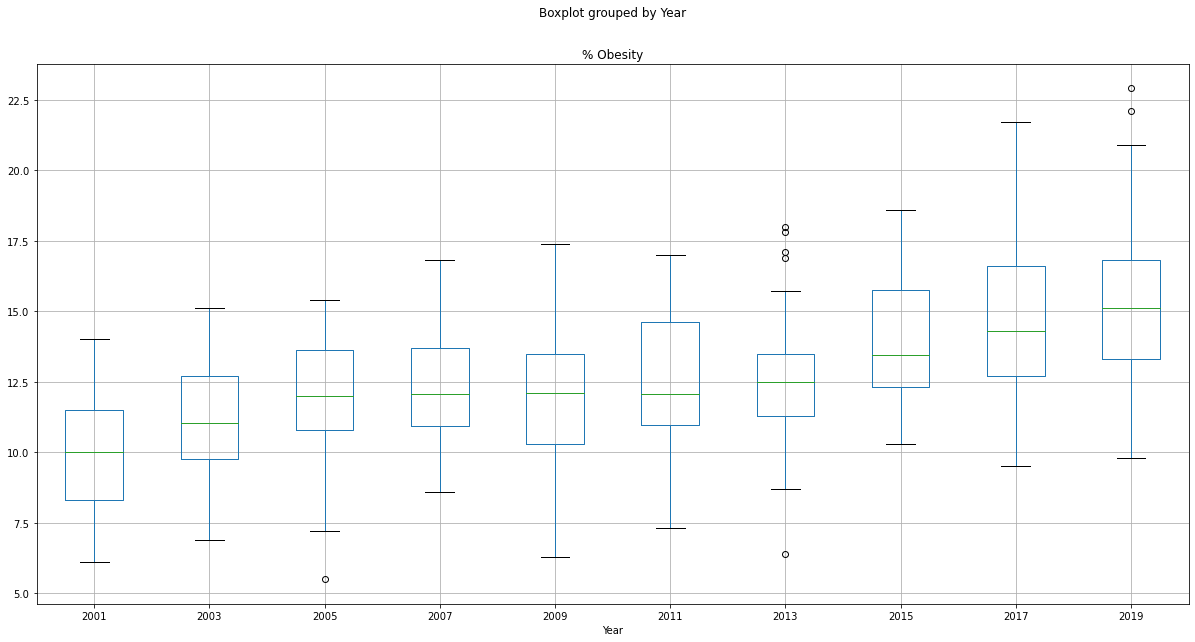

In [14]:
# perform anova analysis
youth_obesity_anova.boxplot("% Obesity", by= "Year", figsize = (20, 10))
plt.savefig("Images/anova_analysis.png")

In [15]:
y2001 = youth_obesity_anova[youth_obesity_anova["Year"]==2001]["% Obesity"]
y2003 = youth_obesity_anova[youth_obesity_anova["Year"]==2003]["% Obesity"]
y2005 = youth_obesity_anova[youth_obesity_anova["Year"]==2005]["% Obesity"]
y2007 = youth_obesity_anova[youth_obesity_anova["Year"]==2007]["% Obesity"]
y2009 = youth_obesity_anova[youth_obesity_anova["Year"]==2009]["% Obesity"]
y2011 = youth_obesity_anova[youth_obesity_anova["Year"]==2011]["% Obesity"]
y2013 = youth_obesity_anova[youth_obesity_anova["Year"]==2013]["% Obesity"]
y2015 = youth_obesity_anova[youth_obesity_anova["Year"]==2015]["% Obesity"]
y2017 = youth_obesity_anova[youth_obesity_anova["Year"]==2017]["% Obesity"]
y2019 = youth_obesity_anova[youth_obesity_anova["Year"]==2019]["% Obesity"]

In [16]:
stats.f_oneway(y2001, y2003, y2005, y2007, y2009, y2011, y2013, y2015, y2017, y2019)

F_onewayResult(statistic=13.906875693349924, pvalue=4.120303786727125e-19)

In [19]:
# pull CSV for all years for chi squared analysis

chi_squared_df = pd.read_csv("Resources/youth_obesity_national.csv")

chi_squared_df

,Year,Location,% Obesity in Adolescents
0,2001,US,10.5
1,2003,US,12.0
2,2005,US,13.0
3,2007,US,12.8
4,2009,US,11.8
5,2011,US,13.0
6,2013,US,13.7
7,2015,US,13.9
8,2017,US,14.8
9,2019,US,15.5


In [21]:
chi_squared_df.mean()["% Obesity in Adolescents"]

13.1

In [24]:
# second 
chi_squared_df["Expected"] = chi_squared_df.mean()["% Obesity in Adolescents"]
chi_squared_df = chi_squared_df.rename(columns = {"% Obesity in Adolescents": "Observed"})
chi_squared_df

,Year,Location,Observed,Expected
0,2001,US,10.5,13.1
1,2003,US,12.0,13.1
2,2005,US,13.0,13.1
3,2007,US,12.8,13.1
4,2009,US,11.8,13.1
5,2011,US,13.0,13.1
6,2013,US,13.7,13.1
7,2015,US,13.9,13.1
8,2017,US,14.8,13.1
9,2019,US,15.5,13.1


In [28]:
critical_value = stats.chi2.ppf(q = 0.95, df = 9)
critical_value

16.918977604620448

In [27]:
stats.chisquare(chi_squared_df["Observed"], chi_squared_df["Expected"])

Power_divergenceResult(statistic=1.482442748091603, pvalue=0.9972749347800589)

In [17]:
obesity_state_scatter = pd.read_csv("Resources/youth_obesity_state_scatter.csv")
obesity_state_scatter.head()

,Year,Location,% Obesity in Adolescents
0,2019,Alabama,17.2
1,2005,Alabama,14.6
2,2003,Alabama,13.3
3,2011,Alabama,17.0
4,2009,Alabama,13.3


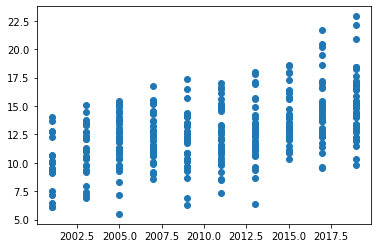

In [18]:
year_s = obesity_state_scatter["Year"]

percent_s = obesity_state_scatter["% Obesity in Adolescents"]

plt.scatter(year_s, percent_s)

In [19]:
obesity_national_scatter = pd.read_csv("Resources/youth_obesity_national.csv")

obesity_national_scatter.head()

,Year,Location,% Obesity in Adolescents
0,2001,US,10.5
1,2003,US,12.0
2,2005,US,13.0
3,2007,US,12.8
4,2009,US,11.8


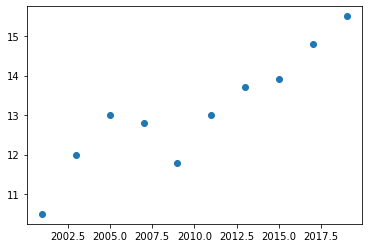

In [19]:
year_n = obesity_national_scatter["Year"]
percent_n = obesity_national_scatter["% Obesity in Adolescents"]

plt.scatter(year_n, percent_n)